In [1]:
import sys
from pathlib import Path
import pandas as pd

# Ensure root is on path
sys.path.append(str(Path().resolve().parent))

from backtesting.strategy.momentum import MomentumStrategy
from backtesting.engine.backtester import BacktestRunner

# Load data
df = pd.read_csv("../backtesting/data/spy.csv", parse_dates=["Date"], index_col="Date")

# Run strategy
strategy = MomentumStrategy(lookback=20)
bt = BacktestRunner(prices, strategy, slippage_bps=5)
results = bt.run()

# View results
print(results)

{'Annualized Return': 19.709525982216114, 'Sharpe Ratio': 3.801075943489127, 'Max Drawdown': -0.009457370883112057}


In [4]:
import pandas as pd
from pathlib import Path

from backtesting.engine.backtester import BacktestRunner
from backtesting.strategy.buy_and_hold import BuyAndHoldStrategy

sys.path.append(str(Path().resolve().parent))

# Load price data
df = pd.read_csv("../backtesting/data/raw/s&p_500_e-mini.csv", parse_dates=["Date"], index_col="Date")
prices = df["Price"]

# Run buy-and-hold backtest
strategy = BuyAndHoldStrategy()
bt = BacktestRunner(prices, strategy, slippage_bps=0.0)
results = bt.run()
print(results)

{'Annualized Return': 11.264039436553364, 'Sharpe Ratio': 0.4037606229097999, 'Max Drawdown': -0.34445346520038367}


Setup complete
Data loaded: 2436 observations from 2016-01-04 00:00:00 to 2025-09-04 00:00:00
Data Summary:
                ES           TY
count  2436.000000  2436.000000
mean      0.054774    -0.003969
std       1.138370     0.349025
min     -10.376484    -1.506229
25%      -0.373297    -0.196713
50%       0.062152     0.000000
75%       0.567461     0.190330
max       9.795091     1.982722

Correlation: -0.135


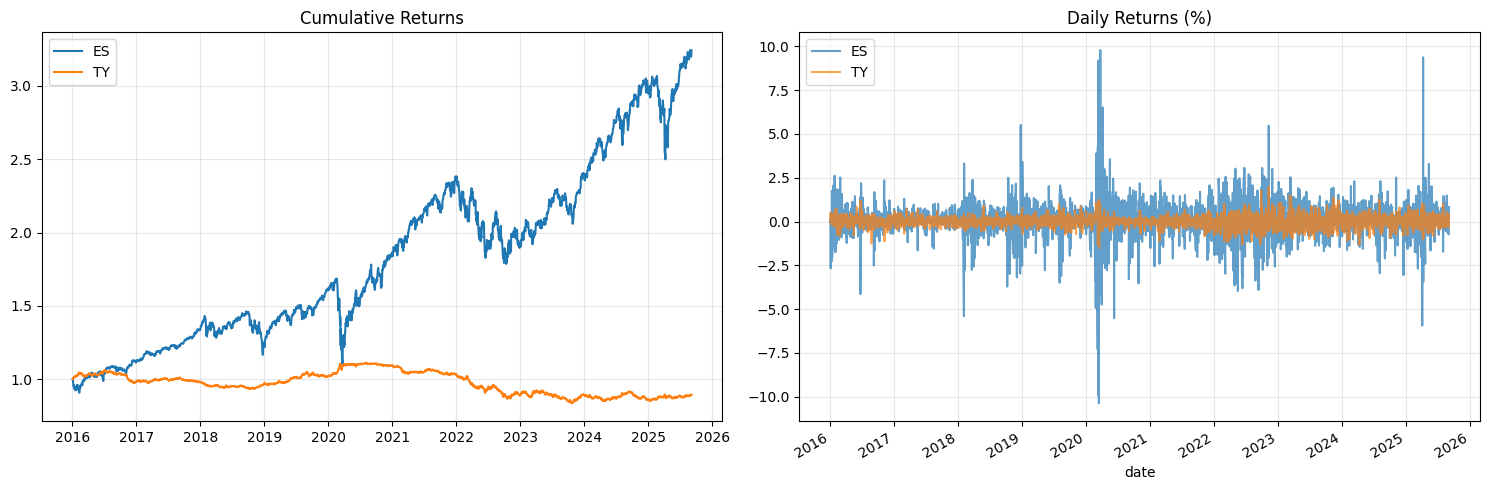

Generated weights for 2184 days
Average allocation:
  ES: 24.4%
  TY: 75.6%

Performance Comparison:
    Strategy Annualized_Return Volatility Sharpe_Ratio Max_Drawdown
 Risk Parity             2.46%      5.71%        -0.42       -0.18%
Equal Weight             6.30%      9.37%         0.17       -0.20%
     ES Only            13.12%     18.56%         0.49       -0.34%
     TY Only            -1.11%      5.62%        -1.06       -0.25%
Allocation Analysis:
Average turnover per month: 1.7%
Most stable period: 2024-02-21
Most volatile period: 2021-04-27

Weight Distribution:
ES: Min=20.0%, Mean=24.4%, Max=36.3%
TY: Min=63.7%, Mean=75.6%, Max=80.0%

SUMMARY:
Risk Parity vs Equal Weight:
  Total Return: 0.34% vs 0.52%
  Better by: -0.18%
  Risk Parity outperformed 959/2184 days (43.9%)

Key Insights:
- Risk parity reduced volatility
- Strategy rebalanced approximately 53 times
- Correlation between assets: -0.135
- Low correlation provides good diversification benefits


/var/folders/nn/h0bc_6mn0sl4l3hs0116k4b00000gn/T/ipykernel_22278/1992283553.py:175: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"- Strategy rebalanced approximately {len(weights_df.diff().dropna()[weights_df.diff().abs().sum(axis=1) > 0.01])} times")


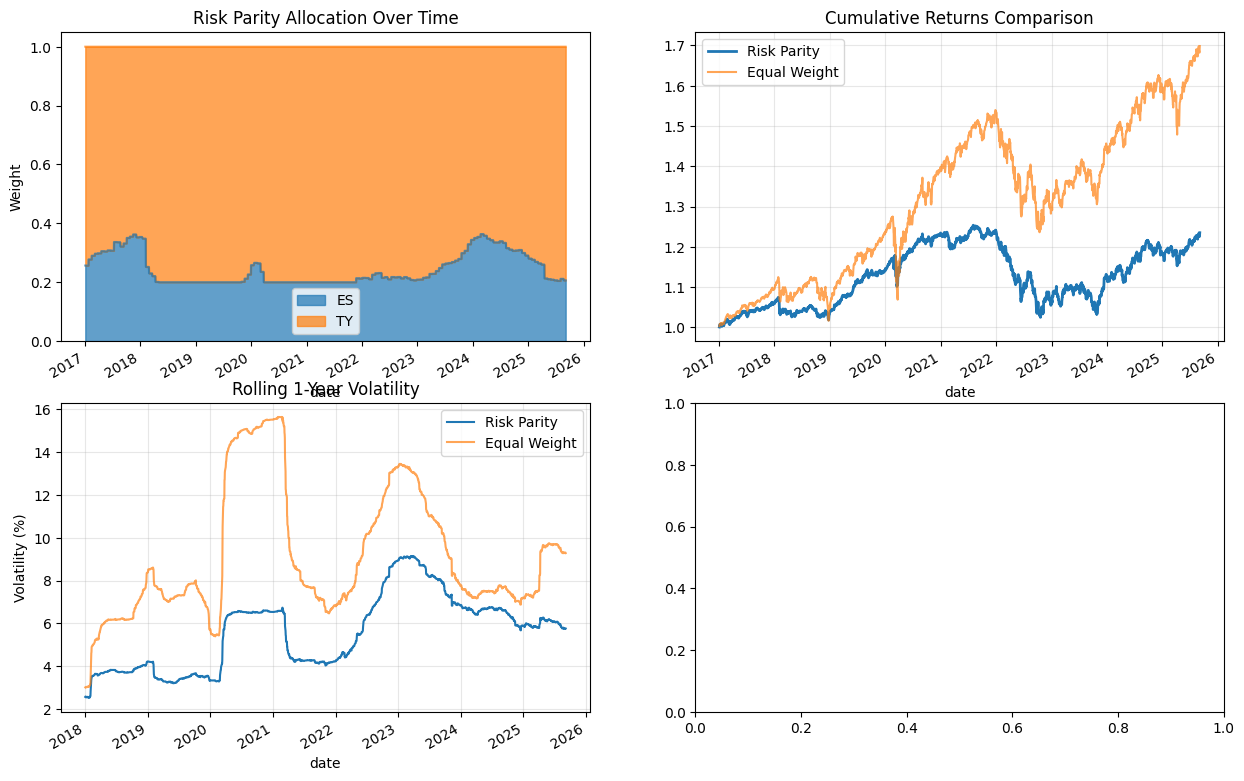

In [4]:
# Simple Risk Parity Strategy Testing
# Jupyter Notebook - Streamlined Version

# Cell 1: Setup
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add project paths
project_root = Path.cwd().parent
sys.path.append(str(project_root / "backtesting" / "strategy"))
sys.path.append(str(project_root / "backtesting" / "valuation"))

from risk_parity import RiskParityStrategy
from utils import get_sharpe_ratio, get_max_drawdown, annualize_return, calculate_volatility

print("Setup complete")

# Cell 2: Load Data
def load_data():
    processed_dir = project_root / "backtesting" / "data" / "processed"

    # Load ES
    es_df = pd.read_csv(processed_dir / "ES_continuous.csv", index_col=0, parse_dates=True)
    # Load TY
    ty_df = pd.read_csv(processed_dir / "TY_continuous.csv", index_col=0, parse_dates=True)

    # Combine returns (as percentages for your existing functions)
    returns_df = pd.DataFrame({
        'ES': es_df['rx_pct'] * 100,
        'TY': ty_df['rx_pct'] * 100
    }).dropna()

    print(f"Data loaded: {len(returns_df)} observations from {returns_df.index[0]} to {returns_df.index[-1]}")
    return returns_df

returns_df = load_data()

# Cell 3: Basic Data Overview
print("Data Summary:")
print(returns_df.describe())

print(f"\nCorrelation: {returns_df.corr().iloc[0,1]:.3f}")

# Plot prices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Cumulative returns
for col in returns_df.columns:
    cumret = (1 + returns_df[col]/100).cumprod()
    ax1.plot(cumret.index, cumret, label=col)
ax1.set_title('Cumulative Returns')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Daily returns
returns_df.plot(ax=ax2, alpha=0.7)
ax2.set_title('Daily Returns (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 4: Test Risk Parity Strategy
rp = RiskParityStrategy(lookback=252, rebalance_freq=21)
weights_df = rp.generate_weights(returns_df)

print(f"Generated weights for {len(weights_df)} days")
print(f"Average allocation:")
for col in weights_df.columns:
    print(f"  {col}: {weights_df[col].mean():.1%}")

# Cell 5: Calculate Portfolio Performance
# Align returns and weights
aligned_returns = returns_df.reindex(weights_df.index)
portfolio_returns = (aligned_returns * weights_df).sum(axis=1)

# Equal weight benchmark
equal_weight_returns = aligned_returns.mean(axis=1)

# Calculate metrics using your existing functions
def calc_metrics(returns_series, name):
    try:
        ann_ret = annualize_return(returns_series)
        vol = calculate_volatility(returns_series)
        sharpe = get_sharpe_ratio(returns_series)
        max_dd = get_max_drawdown(returns_series)

        return {
            'Strategy': name,
            'Annualized_Return': f"{ann_ret:.2f}%",
            'Volatility': f"{vol:.2f}%",
            'Sharpe_Ratio': f"{sharpe:.2f}",
            'Max_Drawdown': f"{max_dd:.2f}%"
        }
    except Exception as e:
        print(f"Error calculating metrics for {name}: {e}")
        return None

# Calculate metrics
rp_metrics = calc_metrics(portfolio_returns, "Risk Parity")
eq_metrics = calc_metrics(equal_weight_returns, "Equal Weight")

# Individual asset metrics
es_metrics = calc_metrics(aligned_returns['ES'], "ES Only")
ty_metrics = calc_metrics(aligned_returns['TY'], "TY Only")

# Results table
results = pd.DataFrame([rp_metrics, eq_metrics, es_metrics, ty_metrics])
print("\nPerformance Comparison:")
print(results.to_string(index=False))

# Cell 6: Portfolio Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Allocation over time
weights_df.plot.area(ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Risk Parity Allocation Over Time')
axes[0,0].set_ylabel('Weight')
axes[0,0].legend()

# Cumulative performance comparison
rp_cumret = (1 + portfolio_returns/100).cumprod()
eq_cumret = (1 + equal_weight_returns/100).cumprod()

rp_cumret.plot(ax=axes[0,1], label='Risk Parity', linewidth=2)
eq_cumret.plot(ax=axes[0,1], label='Equal Weight', alpha=0.7)
axes[0,1].set_title('Cumulative Returns Comparison')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Rolling 1-year volatility
rp_vol = portfolio_returns.rolling(252).std() * np.sqrt(252)
eq_vol = equal_weight_returns.rolling(252).std() * np.sqrt(252)

rp_vol.plot(ax=axes[1,0], label='Risk Parity')
eq_vol.plot(ax=axes[1,0], label='Equal Weight', alpha=0.7)
axes[1,0].set_title('Rolling 1-Year Volatility')
axes[1,0].set_ylabel('Volatility (%)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)


# Cell 7: Allocation Statistics
print("Allocation Analysis:")
print(f"Average turnover per month: {weights_df.diff().abs().sum(axis=1).mean() * 21:.1%}")
print(f"Most stable period: {weights_df.std(axis=1).idxmin().strftime('%Y-%m-%d')}")
print(f"Most volatile period: {weights_df.std(axis=1).idxmax().strftime('%Y-%m-%d')}")

# Show weight distribution
print(f"\nWeight Distribution:")
for col in weights_df.columns:
    weights = weights_df[col]
    print(f"{col}: Min={weights.min():.1%}, Mean={weights.mean():.1%}, Max={weights.max():.1%}")

# Cell 8: Summary
print("\nSUMMARY:")
print("="*50)

rp_final_ret = (1 + portfolio_returns/100).iloc[-1] - 1
eq_final_ret = (1 + equal_weight_returns/100).iloc[-1] - 1

print(f"Risk Parity vs Equal Weight:")
print(f"  Total Return: {rp_final_ret:.2%} vs {eq_final_ret:.2%}")
print(f"  Better by: {(rp_final_ret - eq_final_ret):.2%}")

outperform_days = (portfolio_returns > equal_weight_returns).sum()
total_days = len(portfolio_returns)
print(f"  Risk Parity outperformed {outperform_days}/{total_days} days ({outperform_days/total_days:.1%})")

print(f"\nKey Insights:")
print(f"- Risk parity {'reduced' if portfolio_returns.std() < equal_weight_returns.std() else 'increased'} volatility")
print(f"- Strategy rebalanced approximately {len(weights_df.diff().dropna()[weights_df.diff().abs().sum(axis=1) > 0.01])} times")
print(f"- Correlation between assets: {returns_df.corr().iloc[0,1]:.3f}")

if returns_df.corr().iloc[0,1] > 0.7:
    print("- High correlation suggests limited diversification benefits")
elif returns_df.corr().iloc[0,1] < 0.3:
    print("- Low correlation provides good diversification benefits")
else:
    print("- Moderate correlation provides some diversification benefits")